In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
%pylab inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Reading data from CSV file
#df = pd.read_csv("D:/Iris.csv")
#Defining data and label
#X = df.iloc[:, 1:5]
#y = df.iloc[:, 5]

In [3]:


iris = datasets.load_iris()
XX = pd.DataFrame(iris.data, columns=iris.feature_names)
yy = pd.DataFrame(iris.target)

In [4]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


In [5]:
#Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#X_train_std and X_test_std are the scaled datasets to be used in algorithms

SVM

In [48]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))

The accuracy of the SVM classifier on training data is 0.97
The accuracy of the SVM classifier on test data is 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
#Applying Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test_std, y_test)))

The accuracy of the Knn classifier on training data is 0.97
The accuracy of the Knn classifier on test data is 0.98


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [91]:
from sklearn.naive_bayes import GaussianNB

#load the csv file
df=pd.read_csv('D:/Iris.csv')

#Replace Species type with numbers
df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

# Split-out validation dataset
array = df.values
X = array[:,1:5]
Y = array[:,5]

In [138]:
clf = GaussianNB()

In [139]:
# One-third of data as a part of test set
validation_size = 0.33

seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(XX, yy, test_size=validation_size, random_state=seed)

In [140]:
clf.fit(X_train, Y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [141]:
# Test options and evaluation metric
scoring = 'accuracy'

In [142]:
from sklearn import model_selection

In [145]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_V = model_selection.cross_val_score(GaussianNB(), X_validation, Y_validation, cv=kfold, scoring=scoring)
#displaying the mean and standard deviation of the prediction

#msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
#print(msg)

print('The accuracy of the Naive Bayes classifier on training data is {:.2f}'.format(cv_results.mean()))
print('The accuracy of the Naive Bayes classifier on test data is {:.2f}'.format(cv_results_V.mean()))

The accuracy of the Knn classifier on training data is 0.97
The accuracy of the Knn classifier on test data is 0.88


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [37]:
#Applying XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_std, y_train)

print('The accuracy of the XGBoost classifier on training data is {:.2f}'.format(xgb_clf.score(X_train_std, y_train)))
print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_clf.score(X_test_std, y_test)))

The accuracy of the XGBoost classifier on training data is 1.00
The accuracy of the XGBoost classifier on test data is 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will 

In [6]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train_std, y_train)

#Print performance
print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(X_train_std, y_train)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(X_test_std, y_test)))

The accuracy of the Decision Tree classifier on training data is 1.00
The accuracy of the Decision Tree classifier on test data is 0.98


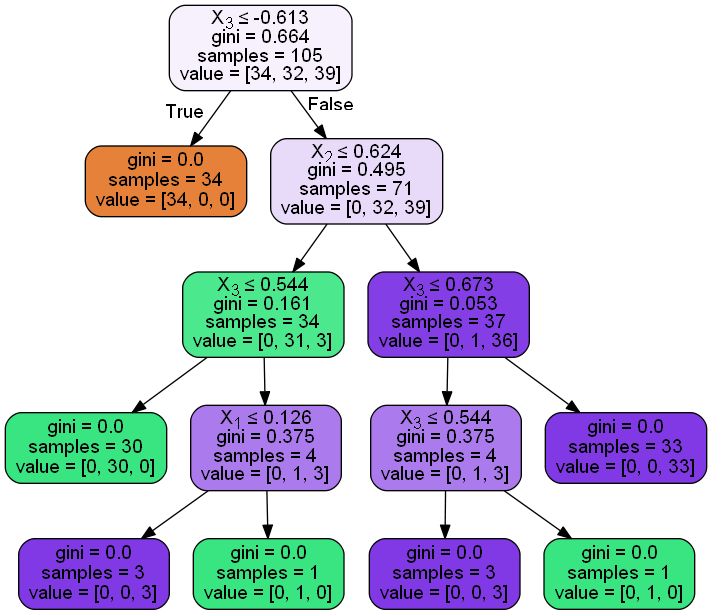

In [7]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train_std, y_train)

#Print performance
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(X_train_std, y_train)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(X_test_std, y_test)))

The accuracy of the Random Forest classifier on training data is 1.00
The accuracy of the Random Forest classifier on test data is 0.98


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [1]:
#Neural Network Classification

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split


from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


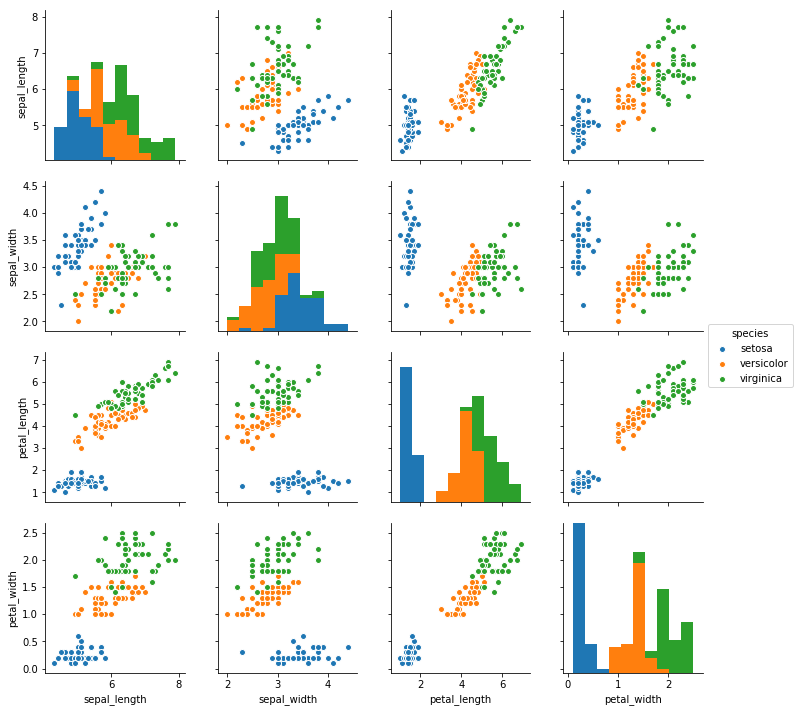

In [2]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species')


In [3]:
X=iris.values[:,:4]
y=iris.values[:,4]


X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=1)

In [4]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)


In [5]:
model=Sequential()

model.add(Dense(16,input_shape=(4,)))
model.add(Activation("sigmoid"))

model.add(Dense(3))
model.add(Activation("softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train,y_train_ohe,nb_epoch=20,batch_size=1,verbose=1)

loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
75/75 [==============================] - 2s 29ms/step - loss: 1.1284 - acc: 0.3067
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 1.0860 - acc: 0.3333
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 1.0352 - acc: 0.3467
Epoch 4/20
75/75 [==============================] - 0s 3ms/step - loss: 0.9883 - acc: 0.4133
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.9437 - acc: 0.7867
Epoch 6/20
75/75 [==============================] - 0s 3ms/step - loss: 0.9036 - acc: 0.8267
Epoch 7/20
75/75 [==============================] - 0s 4ms/step - loss: 0.8562 - acc: 0.8533
Epoch 8/20
75/75 [==============================] - 0s 3ms/step - loss: 0.8175 - acc: 0.8267
Epoch 9/20
75/75 [==============================] - 0s 4ms/step - loss: 0.7736 - acc: 0.8800
Epoch 10/20
75/75 [==============================] - 0s 3ms/step - loss: 0.7397 - acc: 0.8800
Epoch 11/20
75/75 [==============================] - 0s 4ms/step - l

In [ ]:
#Neural Network Classification

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split


from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species')

X=iris.values[:,:4]
y=iris.values[:,4]


X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=1)

def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)

model=Sequential()

model.add(Dense(16,input_shape=(4,)))
model.add(Activation("sigmoid"))

model.add(Dense(3))
model.add(Activation("softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

model.fit(X_train,y_train_ohe,nb_epoch=20,batch_size=1,verbose=1)

loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))